In [25]:
# Load Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
df = pd.read_csv('emotional_monitoring_dataset_with_target.csv')

In [3]:
df.head(10)

,HeartRate,SkinConductance,EEG,Temperature,PupilDiameter,SmileIntensity,FrownIntensity,CortisolLevel,ActivityLevel,AmbientNoiseLevel,LightingLevel,EmotionalState,CognitiveState,EngagementLevel
0,61,8.937204,11.794946,36.501723,3.330181,0.689238,0.189024,0.603035,136,59,394,engaged,distracted,3
1,60,12.635397,19.151412,36.618910,3.428995,0.561056,0.091367,0.566671,155,39,479,engaged,distracted,1
2,81,3.660028,6.226098,36.176898,2.819286,0.417951,0.227355,1.422475,55,30,832,partially engaged,focused,3
3,119,0.563070,4.542968,37.205293,2.192961,0.140186,0.502965,1.669045,39,40,602,disengaged,focused,3
4,118,0.477378,0.996209,37.248118,2.450139,0.064471,0.695604,1.854076,10,42,908,disengaged,focused,3
5,77,9.024552,19.670160,36.805665,3.728565,0.672491,0.133990,0.628899,151,47,449,engaged,focused,3
6,83,4.049830,6.347192,36.299362,2.721967,0.419392,0.258176,1.357725,58,42,504,partially engaged,focused,3
7,112,1.322309,3.477926,37.352050,2.341349,0.078562,0.618456,1.627409,9,55,388,disengaged,focused,3
8,92,2.205339,7.237501,36.082011,2.673052,0.463996,0.276809,1.304935,85,34,598,partially engaged,focused,2
9,89,4.761323,8.218164,36.135477,2.561627,0.329945,0.356533,1.294055,77,59,663,partially engaged,distracted,3


# Data Cleaning 

In [4]:
# Checking for null/missing values

null_counts = df.isnull().sum()
print(null_counts)

HeartRate            0
SkinConductance      0
EEG                  0
Temperature          0
PupilDiameter        0
SmileIntensity       0
FrownIntensity       0
CortisolLevel        0
ActivityLevel        0
AmbientNoiseLevel    0
LightingLevel        0
EmotionalState       0
CognitiveState       0
EngagementLevel      0
dtype: int64


In [5]:
# Checking for duplicate values
df.drop_duplicates(inplace=True)


In [6]:
# Convert Data Types - Ensure that numerical columns are of the correct data type.
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HeartRate          1000 non-null   int64  
 1   SkinConductance    1000 non-null   float64
 2   EEG                1000 non-null   float64
 3   Temperature        1000 non-null   float64
 4   PupilDiameter      1000 non-null   float64
 5   SmileIntensity     1000 non-null   float64
 6   FrownIntensity     1000 non-null   float64
 7   CortisolLevel      1000 non-null   float64
 8   ActivityLevel      1000 non-null   int64  
 9   AmbientNoiseLevel  1000 non-null   int64  
 10  LightingLevel      1000 non-null   int64  
 11  EmotionalState     1000 non-null   object 
 12  CognitiveState     1000 non-null   object 
 13  EngagementLevel    1000 non-null   int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 117.2+ KB


In [7]:
# Outlier Detection and Treatment
# Using Z-score to identify outliers
from scipy import stats
z_scores = np.abs(stats.zscore(df[['HeartRate', 
                        'SkinConductance', 
                        'EEG']]))
# Keep rows where z-scores are less than 3
df = df[(z_scores < 3).all(axis=1)]  


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HeartRate          1000 non-null   int64  
 1   SkinConductance    1000 non-null   float64
 2   EEG                1000 non-null   float64
 3   Temperature        1000 non-null   float64
 4   PupilDiameter      1000 non-null   float64
 5   SmileIntensity     1000 non-null   float64
 6   FrownIntensity     1000 non-null   float64
 7   CortisolLevel      1000 non-null   float64
 8   ActivityLevel      1000 non-null   int64  
 9   AmbientNoiseLevel  1000 non-null   int64  
 10  LightingLevel      1000 non-null   int64  
 11  EmotionalState     1000 non-null   object 
 12  CognitiveState     1000 non-null   object 
 13  EngagementLevel    1000 non-null   int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 117.2+ KB


# Normalizing Physiological Data

In [9]:
# Initialize the MinMaxScaler

scaler = MinMaxScaler()

In [10]:
# Specify the columns to normalize
df2 = pd.read_csv('emotional_monitoring_dataset_with_target.csv')

columns_to_normalize = ['HeartRate', 
                        'SkinConductance', 
                        'EEG', 
                        'Temperature', 
                        'PupilDiameter', 
                        'SmileIntensity', 
                        'FrownIntensity',
                        'CortisolLevel',
                        'ActivityLevel',
                        'AmbientNoiseLevel',
                        'LightingLevel',
                        ]

In [11]:
# Normalize the specified columns

df2[columns_to_normalize] = scaler.fit_transform(df2[columns_to_normalize])

In [12]:
# Display the updated DataFrame

print("Normalized DataFrame:\n", df2)

Normalized DataFrame:
      HeartRate  SkinConductance       EEG  Temperature  PupilDiameter  \
0     0.016949         0.595629  0.589697     0.334290       0.666084   
1     0.000000         0.842340  0.958107     0.412519       0.715587   
2     0.355932         0.243582  0.310810     0.117450       0.410145   
3     1.000000         0.036980  0.226519     0.803964       0.096379   
4     0.983051         0.031263  0.048898     0.832552       0.225216   
..         ...              ...       ...          ...            ...   
995   0.644068         0.259434  0.383697     0.182623       0.312452   
996   0.830508         0.028707  0.016676     0.783026       0.244926   
997   0.813559         0.071284  0.090978     0.715954       0.185218   
998   0.271186         0.950720  0.966035     0.472023       0.697927   
999   0.423729         0.311363  0.430325     0.034970       0.263868   

     SmileIntensity  FrownIntensity  CortisolLevel  ActivityLevel  \
0          0.689828        0.23

# Coding Emotional State and Cognitive State

In [13]:
# Label Encoding for Emotional State
label_encoder = LabelEncoder()
df2['EmotionalStateEncoded'] = label_encoder.fit_transform(df2['EmotionalState'])


In [14]:
# One-Hot Encoding for CognitiveState
df2 = pd.get_dummies(df2, columns=['CognitiveState'], prefix='Cognitive')

In [15]:
# Display the final DataFrame
print("Encoded DataFrame:\n", df2)

Encoded DataFrame:
      HeartRate  SkinConductance       EEG  Temperature  PupilDiameter  \
0     0.016949         0.595629  0.589697     0.334290       0.666084   
1     0.000000         0.842340  0.958107     0.412519       0.715587   
2     0.355932         0.243582  0.310810     0.117450       0.410145   
3     1.000000         0.036980  0.226519     0.803964       0.096379   
4     0.983051         0.031263  0.048898     0.832552       0.225216   
..         ...              ...       ...          ...            ...   
995   0.644068         0.259434  0.383697     0.182623       0.312452   
996   0.830508         0.028707  0.016676     0.783026       0.244926   
997   0.813559         0.071284  0.090978     0.715954       0.185218   
998   0.271186         0.950720  0.966035     0.472023       0.697927   
999   0.423729         0.311363  0.430325     0.034970       0.263868   

     SmileIntensity  FrownIntensity  CortisolLevel  ActivityLevel  \
0          0.689828        0.23641

# EDA

In [20]:
# Summary statistics
df.describe()

,HeartRate,SkinConductance,EEG,Temperature,PupilDiameter,SmileIntensity,FrownIntensity,CortisolLevel,ActivityLevel,AmbientNoiseLevel,LightingLevel,EngagementLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,89.428000,4.886971,8.493616,36.745107,2.833396,0.422318,0.348089,1.242361,83.349000,44.585000,655.651000,2.482000
std,17.339651,4.187668,5.616052,0.435840,0.535909,0.282820,0.236208,0.430722,54.734642,8.672369,197.732236,0.666423
min,60.000000,0.008741,0.019809,36.000958,2.000573,0.000875,0.000050,0.500255,0.000000,30.000000,302.000000,1.000000
25%,75.000000,1.602463,3.993575,36.370811,2.398951,0.155963,0.155691,0.860270,39.000000,37.000000,487.750000,2.000000
50%,89.000000,3.413038,7.400188,36.743273,2.747615,0.397790,0.290736,1.252747,76.000000,44.000000,654.500000,3.000000
75%,105.000000,7.719411,13.004892,37.115120,3.228348,0.650723,0.573842,1.612069,124.000000,52.000000,822.250000,3.000000
max,119.000000,14.998714,19.987929,37.498955,3.996728,0.998751,0.799369,1.999461,199.000000,59.000000,999.000000,3.000000


In [19]:
# Correlation Matrix

df2.corr()


/var/folders/k5/m7c68m2d78jd90dzhj8c1p1c0000gn/T/ipykernel_94337/629395121.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,HeartRate,SkinConductance,EEG,Temperature,PupilDiameter,SmileIntensity,FrownIntensity,CortisolLevel,ActivityLevel,AmbientNoiseLevel,LightingLevel,EngagementLevel,EmotionalStateEncoded,Cognitive_distracted,Cognitive_focused
HeartRate,1.000000,-0.813819,-0.863343,0.451586,-0.865648,-0.888055,0.886961,0.891824,-0.867075,0.011853,-0.001664,0.037396,-0.467177,-0.013984,0.013984
SkinConductance,-0.813819,1.000000,0.844412,-0.198423,0.827216,0.833440,-0.786524,-0.834193,0.829733,-0.037694,-0.010090,-0.230096,0.211073,-0.016113,0.016113
EEG,-0.863343,0.844412,1.000000,-0.319207,0.873858,0.880789,-0.845877,-0.874679,0.870659,-0.020489,0.006047,-0.178328,0.330382,0.009702,-0.009702
Temperature,0.451586,-0.198423,-0.319207,1.000000,-0.333245,-0.386343,0.566185,0.421758,-0.332277,-0.024071,0.002930,0.039114,-0.943011,-0.026029,0.026029
PupilDiameter,-0.865648,0.827216,0.873858,-0.333245,1.000000,0.880923,-0.854949,-0.876244,0.861440,-0.006726,0.003352,-0.059751,0.348571,-0.010244,0.010244
SmileIntensity,-0.888055,0.833440,0.880789,-0.386343,0.880923,1.000000,-0.878329,-0.895058,0.873936,-0.001403,0.000535,-0.064892,0.405772,0.010568,-0.010568
FrownIntensity,0.886961,-0.786524,-0.845877,0.566185,-0.854949,-0.878329,1.000000,0.887497,-0.848265,0.016839,0.003771,0.066387,-0.599091,-0.007283,0.007283
CortisolLevel,0.891824,-0.834193,-0.874679,0.421758,-0.876244,-0.895058,0.887497,1.000000,-0.872264,0.012014,-0.002602,0.069689,-0.447258,-0.018434,0.018434
ActivityLevel,-0.867075,0.829733,0.870659,-0.332277,0.861440,0.873936,-0.848265,-0.872264,1.000000,-0.002290,-0.000173,-0.067789,0.351506,-0.001328,0.001328
AmbientNoiseLevel,0.011853,-0.037694,-0.020489,-0.024071,-0.006726,-0.001403,0.016839,0.012014,-0.002290,1.000000,0.020633,0.029449,0.010280,0.016204,-0.016204


# Visualizations

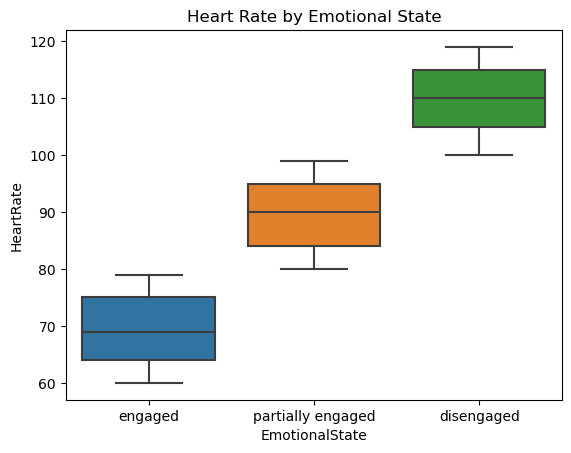

In [26]:
# Heart Rate by Emotional State
sns.boxplot(x='EmotionalState', y='HeartRate', data=df)
plt.title('Heart Rate by Emotional State')
plt.show()


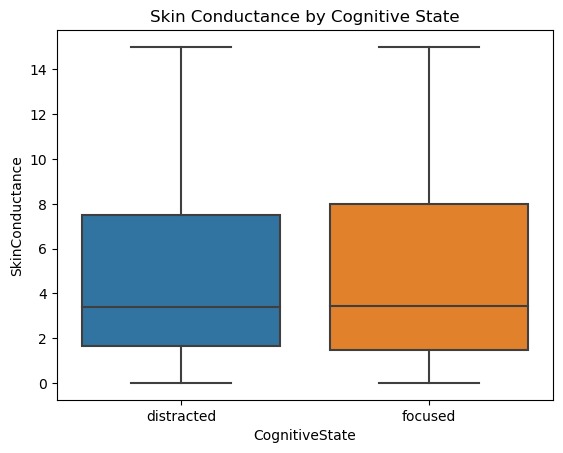

In [27]:
sns.boxplot(x='CognitiveState', y='SkinConductance', data=df)
plt.title('Skin Conductance by Cognitive State')
plt.show()

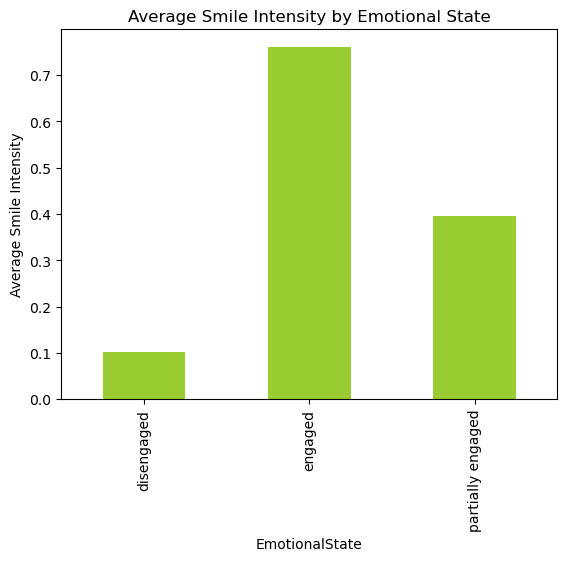

In [29]:
avg_smile = df.groupby('EmotionalState')['SmileIntensity'].mean()
avg_smile.plot(kind='bar', color='yellowgreen')
plt.title('Average Smile Intensity by Emotional State')
plt.ylabel('Average Smile Intensity')
plt.show()

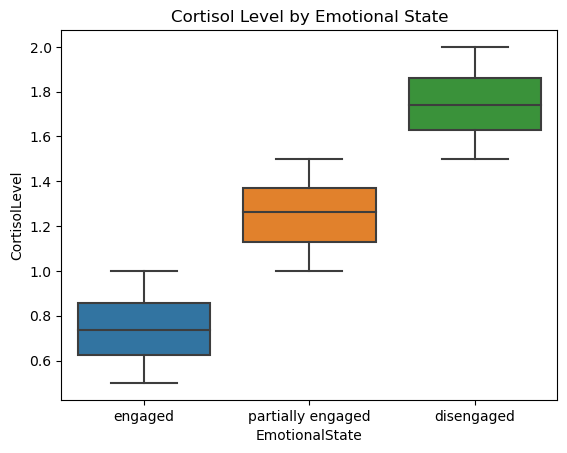

In [30]:
sns.boxplot(x='EmotionalState', y='CortisolLevel', data=df)
plt.title('Cortisol Level by Emotional State')
plt.show()

# Models (if I have time)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [33]:
# Prepare data for modeling 

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

X = numeric_df.drop(columns=['EngagementLevel'])
y = df['EngagementLevel']

In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Make predictions
y_pred = model.predict(X_test)

In [38]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy

0.995

In [40]:
print(report)

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        26
           2       1.00      1.00      1.00        65
           3       0.99      1.00      1.00       109

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

